## 3
Ho appena ricevuto una fornitura di M = 10000 viti. Una frazione p = 0.2 di tali viti è
difettosa, nel senso che un certo numero K delle M viti fornitemi non è in grado di superare
senza spezzarsi una prova di carico.

## 3.1. 
Prendo 100 viti per montare alcuni scaffali. Quale modello probabilistico scegliereste per modellare la variabile casuale X = “numero di viti che dovrò scartare”? Specificatene i parametri, il valore atteso e la varianza.

In [2]:
M=10000
p=0.2
K=M*p
n=100

mean = n*K/M
var  = K/M*((M-K)/M)*n*((M-n)/(M-1))

cat("mean:",mean,"\n")
cat("var :",var ,"\n")

mean: 20 
var : 15.84158 


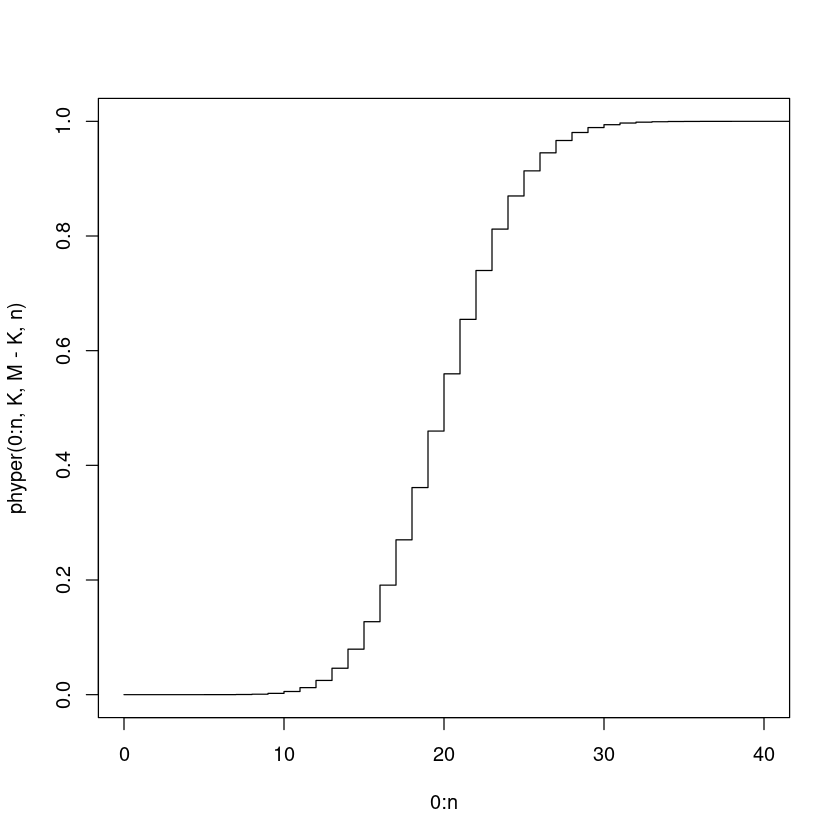

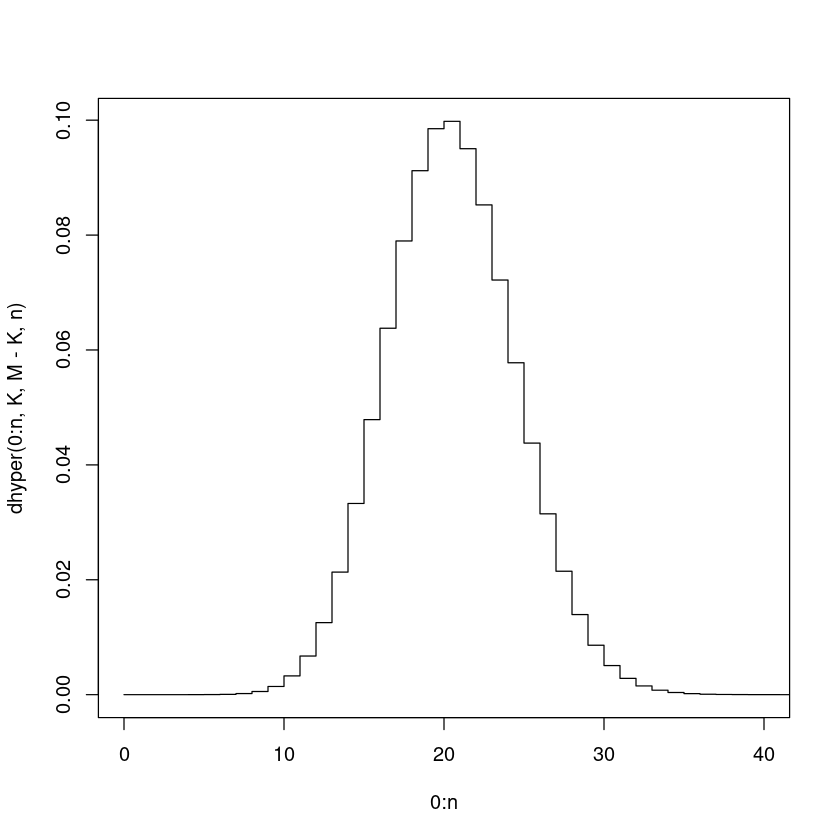

In [14]:
plot(0:n,phyper(0:n,K,M-K,n),type="s",xlim=c(0,40))
plot(0:n,dhyper(0:n,K,M-K,n),type="s",xlim=c(0,40))

## 3.2.1. 
quante viti devo aspettarmi di dover scartare?

In [12]:
print(mean)

[1] 20


## 3.2.2. 
quanto vale la probabilità che io debba scartare un numero di viti superiore a 10?

In [9]:

print(1-phyper(10,K,M-K,n))            # opzione 1 usando la cdf
print(phyper(10,K,M-K,n,lower.tail=F)) # opzione 3 cdf + lower.tail
print(1-sum(dhyper(0:10,K,M-K,n)))     # opzione 2 usando la pmf


[1] 0.9944875
[1] 0.9944875
[1] 0.9944875


## 3.2.3. 
quanto vale la probabilità che io debba scartare un numero di viti compreso tra 15 e 25 estremi compresi?

In [10]:
print(phyper(25,K,M-K,n)-phyper(14,K,M-K,n)) # opzione 1 usando la cmf
print(sum(dhyper(15:25,K,M-K,n)))            # opzione 1 usando la pmf

[1] 0.8342016
[1] 0.8342016


## 3.2.4. 
confrontate questo ultimo risultato con la minorazione data dalla diseguaglianza di Chebyshev, per controllare che esso soddisfa la diseguaglianza.

In [33]:
w = 5
cat("Chebyshev bound:", 1-(var/(w^2))                              ,"\n")
cat("actual prob    :", sum(dhyper(15:25,K,M-K,n))                 ,"\n")
cat("is it respected:", sum(dhyper(15:25,K,M-K,n)) >= 1-(var/(w^2)),"\n")


Chebyshev bound: 0.3536 
actual prob    : 0.8342016 
is it respected: TRUE 


## 3.3. 
A lavoro terminato, tra le 100 viti che avevo preso, ne sono risultate difettose ben 30. Qual è la probabilità che ciò accadesse?

In [12]:
dhyper(30,K,M-K,n)

[1] 0.005063129

## 3.4. 
Chiamo q la probabilità di scartare un numero di viti al più uguale a s. Se prendo n=100
viti e voglio che q sia almeno uguale a 0.8 la probabilità di scartare al più s viti, quanto
vale s?

In [15]:
# s è il quantile 0.8 della distribuzione
q=0.8
s=qhyper(q,K,M-K,n)
print(s)
phyper(s,K,M-K,n)


[1] 23


[1] 0.8120283

## 4
Riguardo al problema descritto nell’esercizio precedente e alla variabile casuale X che conta il
numero di viti che dovrò scartare:
## 4.1. 
ci sono le condizioni per poter approssimare il modello che avete ipotizzato con un altro
modello?

Si, quando M >> 1 allora H(M,K,n) tende binomiale(n,p=K/M)

## 4.2.1. 
Qual è il numero più probabile di viti che dovrò scartare?

In [39]:
p = K/M
n * p

[1] 20

## 4.2.2. 
rispondete alle stesse domande del punto 2 dell’esercizio precedente usando l’approssimazione, e confrontate i risultati numerici che avete ottenuto nei due casi, per controllare che i risultati ottenuti sono molto simili (e quindi l’approssimazione è
ben giustificata).

In [43]:
print(1-phyper(10,K,M-K,n))        # opzione 1 usando la cdf
print(1-sum(dhyper(0:10,K,M-K,n))) # opzione 2 usando la pmf
cat("\n")
print(1-pbinom(10,n,p))        # opzione 1 usando la cdf
print(1-sum(dbinom(0:10,n,p))) # opzione 2 usando la pmf

[1] 0.9944875
[1] 0.9944875

[1] 0.9943036
[1] 0.9943036


In [44]:
print(phyper(25,K,M-K,n)-phyper(14,K,M-K,n)) # opzione 1 usando la cmf
print(sum(dhyper(15:25,K,M-K,n)))            # opzione 1 usando la pmf
cat("\n")
print(pbinom(25,n,p)-pbinom(14,n,p)) # opzione 1 usando la cmf
print(sum(dbinom(15:25,n,p)))            # opzione 1 usando la pmf

[1] 0.8342016
[1] 0.8342016

[1] 0.8320809
[1] 0.8320809


In [16]:
print(dbinom(30,n,p))
print(dhyper(30,K,M-K,n))

[1] 0.005189643
[1] 0.005063129


In [17]:
# s è il quantile 0.8 della distribuzione
w = 5
cat("Chebyshev bound       :", 1-(var/(w^2))                              ,"\n")
cat("actual prob           :", sum(dhyper(15:25,K,M-K,n))                 ,"\n")
cat("aprox. prob           :", sum(dbinom(15:25,n,p))                 ,"\n")
cat("is it respected       :", sum(dhyper(15:25,K,M-K,n)) >= 1-(var/(w^2)),"\n")
cat("approx is it respected:", sum(dbinom(15:25,n,p)) >= 1-(var/(w^2)),"\n")


Chebyshev bound       : 0.3536 
actual prob           : 0.8342016 
aprox. prob           : 0.8320809 
is it respected       : TRUE 
approx is it respected: TRUE 


## 5 
Ciascuna vite costa 1.5 centesimi. Se quando faccio un lavoro raccolgo le viti che si sono spezzate
e le invio al fornitore, ricevo il rimborso del costo pagato. Prendo n=100 viti per iniziare un
lavoro.

## 5.1. 
Esprimere, in funzione di X, la variabile casuale C =“ rimborso che potrei ottenere dal
fornitore”.

C = 1.5*X

## 5.2. 
C è una variabile discreta o continua? Giustificare la risposta

C è una variabile discreta in quanto puo assumere un numero finito di valori, tanti quanti ne può assumere X.

## 5.3. 
Quanti e quali valori può assumere C?

X poteva assumere valori da 0 a 100, di conseguenza 101, esattamente quelli anche C può assumere.  
In particolare può assumere {0, 1.5, 1.5x2, 1.5x3, .. 150}

## 5.4. 
Con quale probabilità assume ciascun valore?

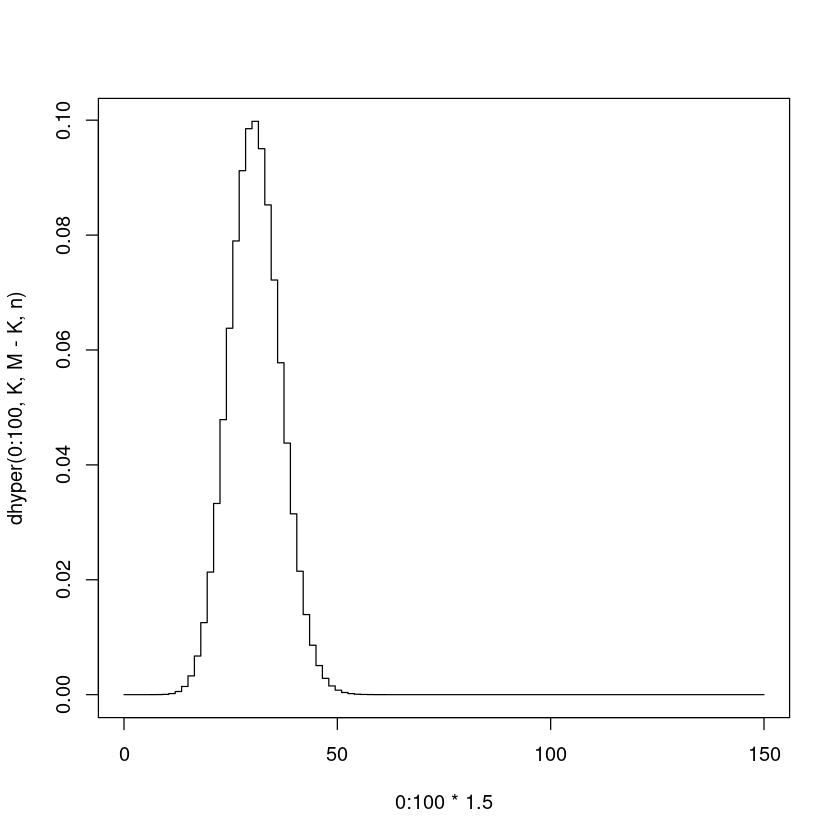

In [61]:
plot(0:100*1.5,dhyper(0:100,K,M-K,n),type="s")

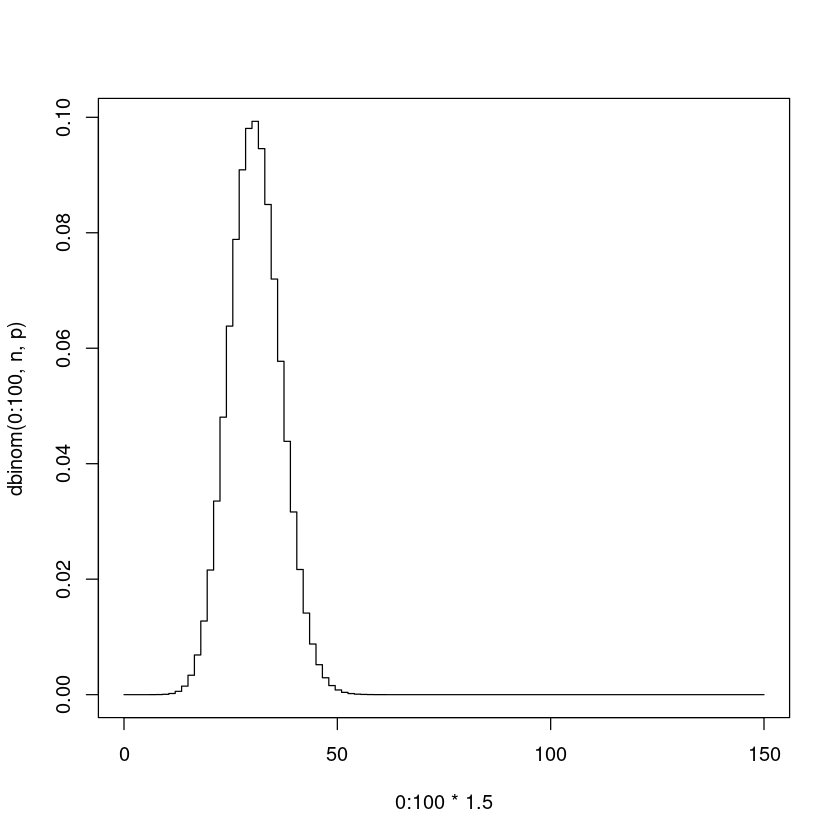

In [62]:
plot(0:100*1.5,dbinom(0:100,n,p),type="s")

## 5.5. 
Qual è il rimborso atteso?

E(C)=E(1.5 \* X)=1.5 \* E(X) per la proprietà di linearità di E(X) (20*1.5 = 30)

## 5.6. 
Calcolare la probabilità di ottenere un rimborso di 18 euro.

In [57]:
numero_di_viti_difettose = 18/1.5 #(12)
dhyper(numero_di_viti_difettose,K,M-K,n)
dbinom(numero_di_viti_difettose,n,p)


[1] 0.01254306

[1] 0.01275388

## 6.
C’è un altro imprevisto la fornitura di viti contiene metà delle viti con taglio “a croce”, e metà
con taglio “piatto”. Il mio cacciavite è a croce. Ho portato con me la scatola con 100 viti e mio
figlio come assistente, che mi porge una vite per volta, la controlla e me la passa se è a croce,
altrimenti, invece di metterla da parte, la rimette nella scatola (ha solo 4 anni....).

## 6.1. 
Qual è la probabilità che, estraendo una vite dalla scatola, questa sia a croce?

la probabilità che la vite sia a croce è p=0.5

## 6.2. 
Quale modello probabilistico scegliereste per modellare la variabile casuale Y che conta
il numero di tentativi prima che la vite scelta da mio figlio sia quella giusta?

geometrica, Y ~ G(p=0.5)


## 6.3. 
Qual è la probabilità che si debbano aspettare meno di 3 tentativi prima di avere una
vite a croce?

In [1]:
p = 0.5
pgeom(2,p)
dgeom(0,p) + dgeom(1,p) + dgeom(2,p)

[1] 0.875

[1] 0.875

## 6.4. 
Mio figlio propone di fare una scommessa: indovinare quanti tentativi saranno necessari
prima di ottenere una vite a croce. Lui punta su 2 tentativi.
Qual è la probabilità che si debbano aspettare esattamente 2 tentativi prima di avere una
vite a croce?

In [22]:
dgeom(2,p)

[1] 0.125

## 6.5. 
Mio figlio ha appena rimesso una vite a taglio piatto nella scatola, ed è convinto di avere
maggiori probabilità di vincere la scommessa ora. Gli date ragione?

no, per la mancanza di memoria della geometrica:
P(Y=2|Y>=1)=P(Y=1)


In [ ]:
P(la 15 vite è a croce | non ho una croce per almeno 10 estrazione) = P(la 5 estrazione è a croce)